In [50]:
import numpy as np
import pandas as pd
import json

import matplotlib.pyplot as plt
import seaborn as sns

# IMDB

In [9]:
df = pd.read_csv('imdb.csv')
df = df.drop_duplicates()
df = df[~((df.Rate == 'No Rate') | (df.Votes == 'No Votes'))]
df.Votes = df.Votes.str.replace(',', '').astype(int)
df.Rate = df.Rate.astype(float)
# df.Duration = df.Duration.fillna(np.nan).astype(int)
# df.Episodes = df.Episodes.str.replace('-', 1).fillna(1).astype(int)
df

,Name,Date,Rate,Votes,Genre,Duration,Type,Certificate,Episodes,Nudity,Violence,Profanity,Alcohol,Frightening
0,No Time to Die,2021,7.6,107163,"Action, Adventure, Thriller",163,Film,PG-13,-,Mild,Moderate,Mild,Mild,Moderate
1,The Guilty,2021,6.3,64375,"Crime, Drama, Thriller",90,Film,R,-,None,None,Severe,None,Moderate
2,The Many Saints of Newark,2021,6.4,27145,"Crime, Drama",120,Film,R,-,Moderate,Severe,Severe,Moderate,Moderate
3,Venom: Let There Be Carnage,2021,6.4,30443,"Action, Adventure, Sci-Fi",97,Film,PG-13,-,None,Moderate,Moderate,Mild,Moderate
4,Dune,2021,8.3,84636,"Action, Adventure, Drama",155,Film,PG-13,-,None,Moderate,None,Mild,Moderate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5023,The Human Centipede II (Full Sequence),2011,3.8,37492,Horror,91,Film,Not Rated,-,Severe,Severe,Severe,Mild,Severe
5024,Double Indemnity,1944,8.3,150448,"Crime, Drama, Film-Noir",107,Film,Passed,-,None,Mild,None,Mild,Mild
5025,Before the Devil Knows You're Dead,2007,7.3,100668,"Crime, Drama, Thriller",117,Film,R,-,Severe,Moderate,Severe,Severe,Severe
5026,Queen Bees,2021,6.0,887,"Comedy, Drama, Romance",100,Film,PG-13,-,None,None,Mild,Moderate,None


In [10]:
df[df.Date == 2021].sort_values('Votes', ascending=False)

,Name,Date,Rate,Votes,Genre,Duration,Type,Certificate,Episodes,Nudity,Violence,Profanity,Alcohol,Frightening
18,Game of Thrones,2021,9.2,1885776,"Action, Adventure, Drama",57,Series,TV-MA,73,Severe,Severe,Severe,Moderate,Severe
52,Breaking Bad,2021,9.4,1593305,"Crime, Drama, Thriller",49,Series,TV-MA,62,Mild,Severe,Moderate,Severe,Severe
49,Stranger Things,2021,8.7,918729,"Drama, Fantasy, Horror",51,Series,TV-14,34,Mild,Moderate,Moderate,Mild,Moderate
10,The Walking Dead,2021,8.2,906327,"Drama, Horror, Thriller",44,Series,TV-14,177,Mild,Severe,Moderate,Mild,Severe
69,Friends,2021,8.8,903947,"Comedy, Romance",22,Series,TV-PG,235,Mild,None,Mild,Mild,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4949,The Last Inn,2021,2.7,70,"Drama, Fantasy, Horror",97,Film,TV-MA,-,Severe,No Rate,No Rate,No Rate,No Rate
4381,The Black Book,2021,3.3,69,Horror,75,Film,None,-,No Rate,No Rate,No Rate,No Rate,No Rate
4991,The Forgiven,2021,6.8,62,Drama,117,Film,None,-,No Rate,No Rate,No Rate,No Rate,No Rate
4367,The Survivor,2021,7.4,53,"Biography, Drama",129,Film,None,-,No Rate,No Rate,No Rate,No Rate,No Rate


In [17]:
for year in sorted(df.Date.unique()):
    print(year, '\n\t' + '\n\t'.join(df[((df.Date == year) & (df.Type == 'Film'))].sort_values('Votes', ascending=False).iloc[:5].Name.values), '\n')

1922 
	Nosferatu 

1927 
	Metropolis 

1931 
	M - Eine Stadt sucht einen Mörder
	Frankenstein
	Dracula 

1932 
	Freaks
	The Mummy 

1933 
	King Kong
	The Invisible Man 

1935 
	Bride of Frankenstein
	I Dream Too Much 

1937 
	Snow White and the Seven Dwarfs
	Stage Door 

1939 
	The Wizard of Oz
	Gone with the Wind 

1940 
	Rebecca 

1941 
	Citizen Kane
	The Maltese Falcon
	How Green Was My Valley 

1942 
	Casablanca
	Cat People 

1943 
	The Seventh Victim 

1944 
	Double Indemnity 

1945 
	Roma città aperta
	The Picture of Dorian Gray 

1946 
	It's a Wonderful Life 

1948 
	Bud Abbott Lou Costello Meet Frankenstein 

1949 
	Little Women 

1950 
	Sunset Blvd.
	All About Eve
	In a Lonely Place 

1951 
	The Thing from Another World 

1952 
	Singin' in the Rain
	High Noon
	The Bad and the Beautiful 

1953 
	Gentlemen Prefer Blondes
	House of Wax
	The Glass Wall 

1954 
	Rear Window
	Shichinin no samurai
	La Strada
	Creature from the Black Lagoon
	Them! 

1955 
	Rebel Without a Cause 

1956

In [42]:
genres = set(map(lambda x: x.strip(), ','.join(df.Genre.unique()).split(',')))
len(genres)

27

Genre popularity over years

In [45]:
res = []
for genre in genres:
    res.append(df[df.Genre.str.contains(genre)].groupby('Date', as_index=False).agg(rate=('Rate', 'mean')))
    res[- 1]['genre'] = genre
res = pd.concat(res)
res

,Date,rate,genre
0,1992,9.000000,Game-Show
1,1996,4.700000,Game-Show
2,1998,7.800000,Game-Show
3,2004,8.400000,Game-Show
4,2010,7.300000,Game-Show
...,...,...,...
47,2018,7.666667,Animation
48,2019,7.123077,Animation
49,2020,7.420000,Animation
50,2021,7.060870,Animation


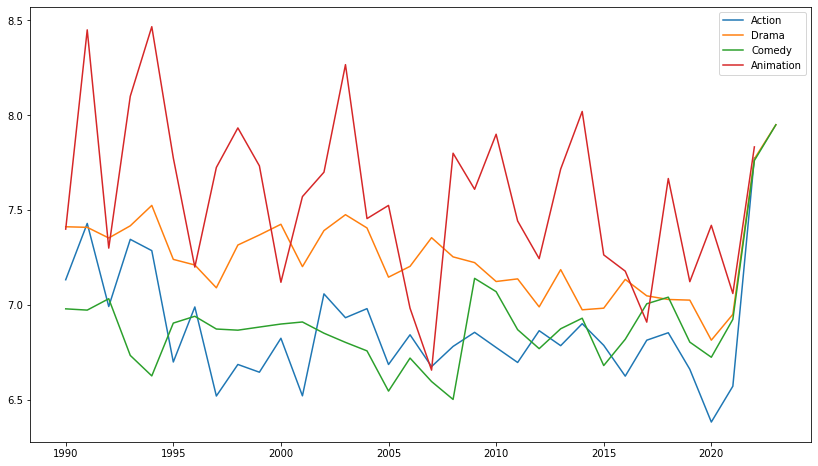

In [48]:
fig, ax = plt.subplots(figsize=(14, 8))
for genre in ('Action', 'Drama', 'Comedy', 'Animation'):#genres:
    data = res[(res.genre == genre) & (res.Date >= 1990)]
    ax.plot(data.Date, data.rate, label=genre)
ax.legend()

# TMDB

In [1]:
import numpy as np
import pandas as pd
import json

import matplotlib.pyplot as plt
import seaborn as sns

In [79]:
df['genres'][0]

"[{'id': 16, 'name': 'Animation'}, {'id': 35, 'name': 'Comedy'}, {'id': 10751, 'name': 'Family'}]"

In [101]:
df = pd.read_csv('movies_metadata.csv', parse_dates=['release_date'])

df = df[df.status == 'Released']
df.drop(columns=['belongs_to_collection', 'homepage', 'imdb_id', 'id', 'overview', 'status', 'tagline', 'original_title', 'poster_path', 'video', 'adult'], inplace=True)
df.dropna(inplace=True)

df.budget = df.budget.astype(int)
df.drop(labels=df[df.release_date.isna() | (df.vote_count < 1) | (df.revenue < 1) | (df.budget < 1) | (df.genres.astype(bool) ^ 1)].index, inplace=True)

df['year'] = pd.DatetimeIndex(df.release_date).year
df = df[(df.year >= 1980) & (df.year <= 2016)]

decoder = {}
for col in ('genres', 'production_companies', 'production_countries', 'spoken_languages'):
    decoder[col] = {}
    new_col = []
    for arr in df[col]:
        try:
            arr = json.loads(arr.replace('\'', '\"'))
            if not arr:
                new_col.append([])
                continue
            id_key = [key for key in arr[0].keys() if key != 'name'][0]
            new_col_val = []
            for val in arr:
                new_col_val.append(val[id_key])
                if val[id_key] not in decoder[col]:
                    decoder[col][val[id_key]] = val['name']
            new_col.append(new_col_val)
        except:
            new_col.append([])
    df[col] = new_col

df

c:\Users\Владислав\AppData\Local\Programs\Python\Python38\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (10) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,budget,genres,original_language,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,title,vote_average,vote_count,year
0,30000000,"[16, 35, 10751]",en,21.946943,[3],[US],1995-10-30,373554033.0,81.0,[en],Toy Story,7.7,5415.0,1995
1,65000000,"[12, 14, 10751]",en,17.015539,"[559, 2550, 10201]",[US],1995-12-15,262797249.0,104.0,"[en, fr]",Jumanji,6.9,2413.0,1995
3,16000000,"[35, 18, 10749]",en,3.859495,[306],[US],1995-12-22,81452156.0,127.0,[en],Waiting to Exhale,6.1,34.0,1995
5,60000000,"[28, 80, 18, 53]",en,17.924927,"[508, 675, 6194]",[US],1995-12-15,187436818.0,170.0,"[en, es]",Heat,7.7,1886.0,1995
8,35000000,"[28, 12, 53]",en,5.23158,"[33, 21437, 23770]",[US],1995-12-22,64350171.0,106.0,[en],Sudden Death,5.5,174.0,1995
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45250,12000000,"[28, 35, 18]",ta,1.323587,[16424],[IN],2007-06-14,19000000.0,185.0,"[ta, te]",Sivaji: The Boss,6.9,25.0,2007
45399,750000,"[80, 35]",ru,0.201582,"[42096, 42097]",[RU],2014-06-05,3.0,0.0,[ru],All at Once,6.0,4.0,2014
45409,800000,"[35, 18]",en,0.903061,[],[],2006-11-23,1328612.0,100.0,[ru],Savages,5.8,6.0,2006
45412,2000000,"[10749, 18]",en,0.121844,[21163],[RU],2010-09-30,1268793.0,107.0,[ru],Pro Lyuboff,4.0,3.0,2010


In [102]:
with open('col_decoder.json', 'w') as f:
    json.dump(decoder, f)
df.to_csv('movies_metadata_clean.csv', index=False)

In [103]:
langs = df.original_language.unique()
len(langs)

39

<AxesSubplot:title={'center':'number of films per year'}, xlabel='year'>

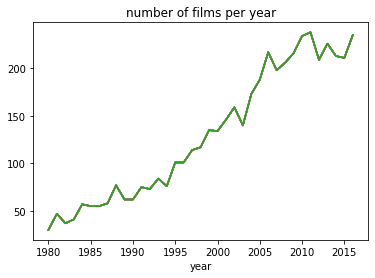

In [104]:
df.groupby('year').count().plot(legend=False, title='number of films per year')

Text(0.5, 1.0, 'Top 10 original languages of the movies')

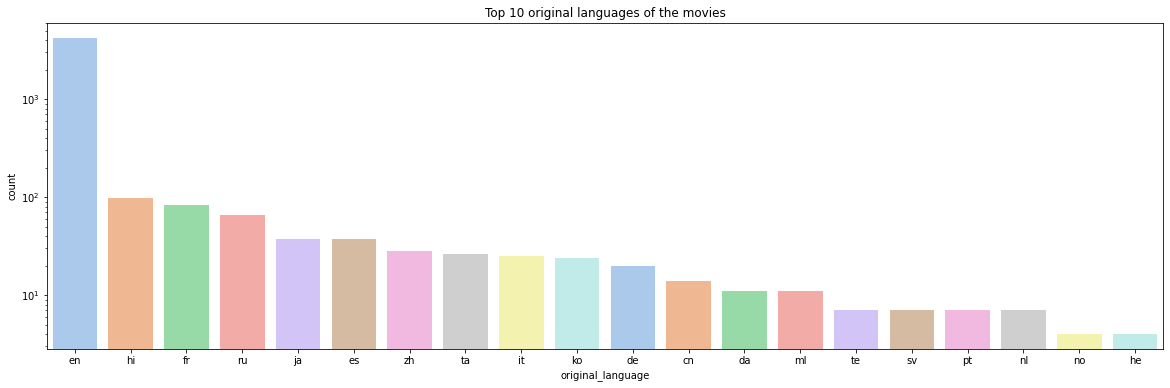

In [105]:
lang_agg = df.groupby('original_language', as_index=False).agg(count=('release_date', 'count')).sort_values('count', ascending=False)
plt.figure(figsize=(20, 6))
sns.barplot(data=lang_agg[:20], x='original_language', y='count', log=True, palette='pastel')
plt.title('Top 10 original languages of the movies')

Text(0.5, 1.0, "Films's rating density by year")

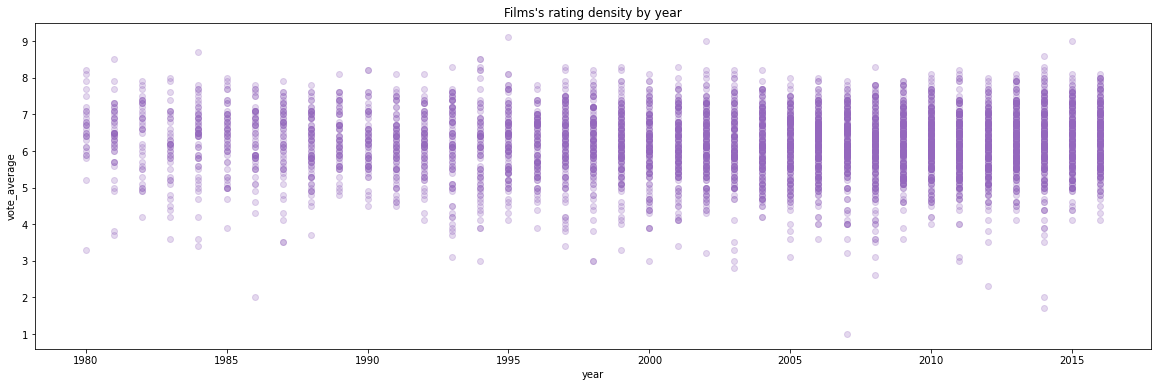

In [106]:
plt.figure(figsize=(20, 6))
sns.regplot(data=df, x='year', y='vote_average', scatter_kws={'alpha': 0.25}, fit_reg=False, color=sns.color_palette()[4])
plt.title('Films\'s rating density by year')

1. Wordcloud for titles by genres